In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
%matplotlib inline
from wavenet import wavenetSC
from pallet import load_patches
                

(10000, 256)

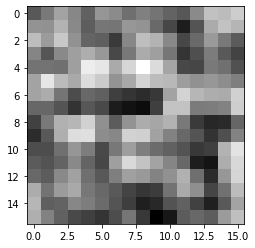

In [2]:
patches = load_patches(normalize=True)
plt.imshow(patches[42].reshape(16,16), cmap='gray')
patches.shape

In [3]:
wnsc = wavenetSC(num_inputs=patches.shape[1], num_outputs=1, num_units=1600, batch_size=128, lmda=.050, 
            lr_r=0.025, lr_W1=0.030, r1=3, r2=5, wi=5, we=30, sigmaE=3, target_sparsity=0.20)


In [4]:
l2_loss, l1_loss, l0_loss, steps = wnsc.train(patches, gradient_steps=10000)

loss=110.075 sparsity=26.80% steps=13: 100%|██████████| 10000/10000 [1:26:55<00:00,  1.92it/s]


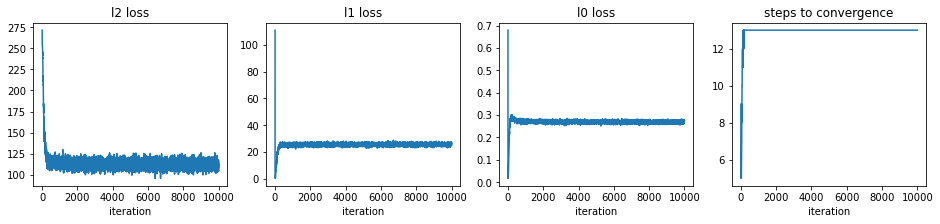

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,3))
ax1.plot(np.arange(len(l2_loss)), l2_loss)
ax1.set_xlabel('iteration')
ax1.set_ylabel('')
ax1.set_title('l2 loss')
ax2.plot(np.arange(len(l1_loss)), l1_loss)
ax2.set_xlabel('iteration')
ax2.set_ylabel('')
_ = ax2.set_title('l1 loss')
ax3.plot(np.arange(len(l0_loss)), l0_loss)
ax3.set_xlabel('iteration')
ax3.set_ylabel('')
_ = ax3.set_title('l0 loss')
ax4.plot(np.arange(len(steps)), steps)
ax4.set_xlabel('iteration')
ax4.set_ylabel('')
_ = ax4.set_title('steps to convergence')


In [6]:
inds = np.random.randint(0, patches.shape[0], wnsc.batch_size)
batch = patches[inds, :]
a, s = wnsc.compute_activations(batch)
print('steps=%d' % s)

steps=13


In [7]:
def activation_map(a, interpolation='gaussian', cmap='jet'):
    im1 = plt.imshow(a.reshape(40, 40), cmap=cmap, interpolation=interpolation)
    fig.colorbar(im1)
    plt.axis('off')


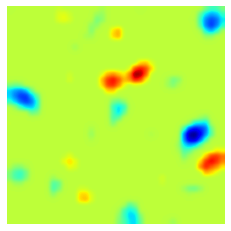

In [8]:
activation_map(a[42,:])


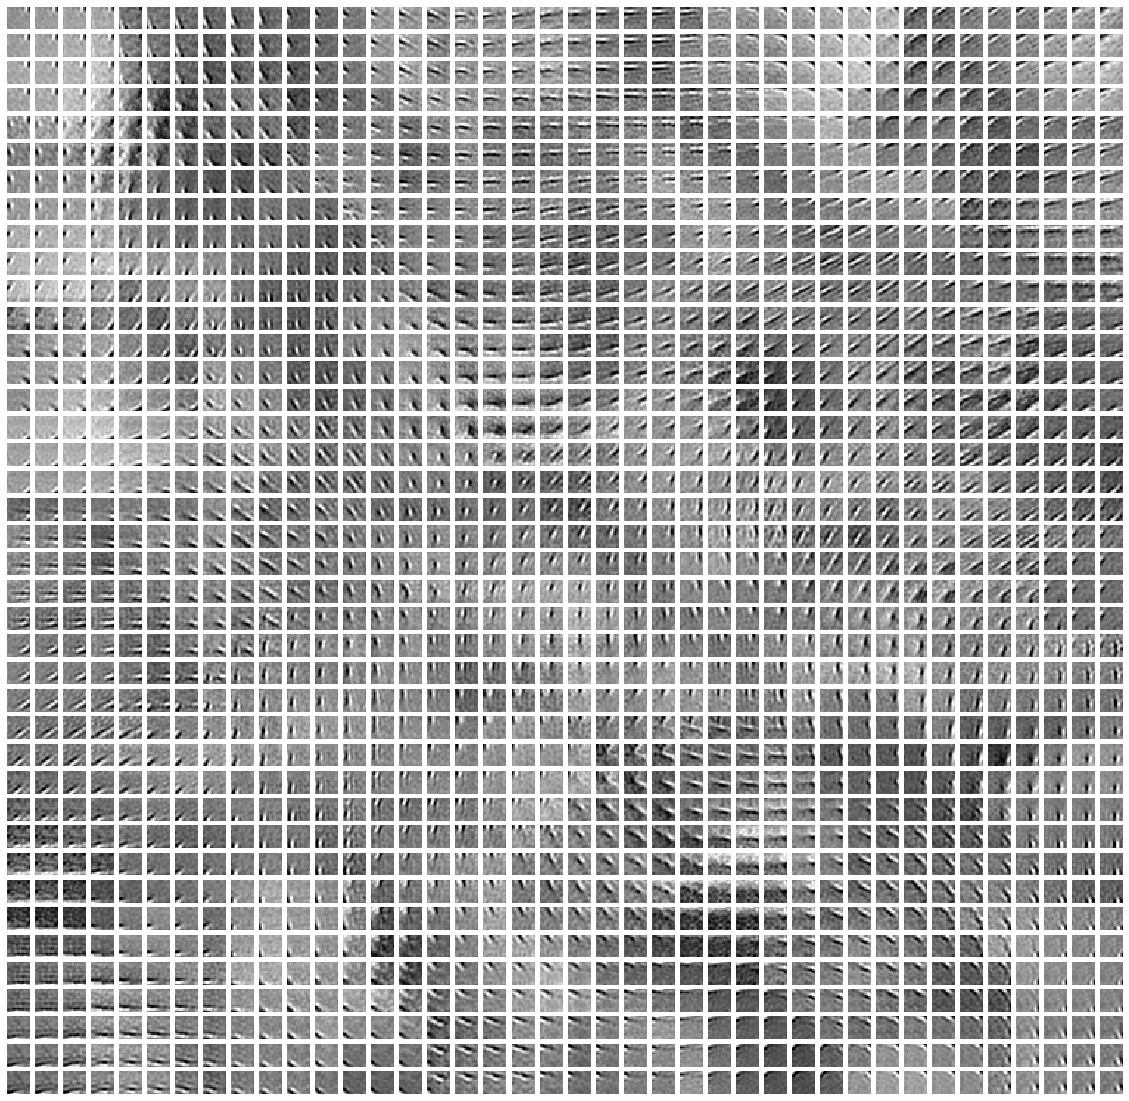

In [10]:
fig, ax = plt.subplots(40, 40, figsize=(20,20))
codewords = wnsc.W1.reshape((wnsc.W1.shape[0], 40, 40))
for i in np.arange(40):
    for j in np.arange(40):
        ax[i,j].imshow(codewords[:,i,j].reshape(16,16), cmap='binary')
        ax[i,j].axis('off')

        

In [11]:
fig.savefig('fig2_normalized.png', bbox_inches='tight')

In [12]:
with open('%s_W1.npy' % 'fig2_normalized', 'wb') as f:
    np.save(f, wnsc.W1)